<a href="https://colab.research.google.com/github/DostdarDost/Linear-Algrbra-for-Machine-Learning/blob/main/GNN_For_paper_citations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:

import os
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers



In [16]:
zip_file=keras.utils.get_file(
    fname="cora.tgz",
    origin="https://linqs-data.soe.ucsc.edu/public/lbc/cora.tgz",
    extract=True,
)
data_dir =os.path.join(os.path.dirname(zip_file), "cora")

168052/168052 [==============================] - 0s 0us/step


In [18]:
citations = pd.read_csv(
    os.path.join(data_dir, "cora.cites"),
    sep="\t",
    header=None,
    names=["target", "source"],
)
print("Citations shape:", citations.shape)

Citations shape: (5429, 2)


In [20]:
citations.sample(frac=1).head()

,target,source
1688,10177,68505
3101,42221,42209
5189,642894,643485
1241,6213,1128267
4545,210871,1129629


import altair as alt
from google.colab import autoviz
df_677291948262937663 = autoviz.get_registered_df('df_677291948262937663')

def histogram(df, colname, maxbins=20, width=100, height=50):
  return (alt.Chart(df).mark_bar()
          .encode(
              x=alt.X(colname, bin=alt.Bin(maxbins=maxbins)),
              y=alt.Y('count()', axis=alt.Axis(title='count')),
          )
          .properties(width=width, height=height))  #  Pixels.

chart = histogram(df_677291948262937663, *['index'], **{})
chart

import altair as alt
from google.colab import autoviz
df_677291948262937663 = autoviz.get_registered_df('df_677291948262937663')

def histogram(df, colname, maxbins=20, width=100, height=50):
  return (alt.Chart(df).mark_bar()
          .encode(
              x=alt.X(colname, bin=alt.Bin(maxbins=maxbins)),
              y=alt.Y('count()', axis=alt.Axis(title='count')),
          )
          .properties(width=width, height=height))  #  Pixels.

chart = histogram(df_677291948262937663, *['target'], **{})
chart

import altair as alt
from google.colab import autoviz
df_677291948262937663 = autoviz.get_registered_df('df_677291948262937663')

def histogram(df, colname, maxbins=20, width=100, height=50):
  return (alt.Chart(df).mark_bar()
          .encode(
              x=alt.X(colname, bin=alt.Bin(maxbins=maxbins)),
              y=alt.Y('count()', axis=alt.Axis(title='count')),
          )
          .properties(width=width, height=height))  #  Pixels.

chart = histogram(df_677291948262937663, *['source'], **{})
chart

import altair as alt
from google.colab import autoviz
df_677291948262937663 = autoviz.get_registered_df('df_677291948262937663')

def value_plot(df, y, sort_ascending=False, width=100, height=50):
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  return (alt.Chart(df.reset_index()).mark_line()
          .encode(x=alt.X('index', title=''), y=alt.X(y, title='value'))
          .properties(width=width, height=height, title=y))

chart = value_plot(df_677291948262937663, *['index'], **{})
chart

import altair as alt
from google.colab import autoviz
df_677291948262937663 = autoviz.get_registered_df('df_677291948262937663')

def value_plot(df, y, sort_ascending=False, width=100, height=50):
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  return (alt.Chart(df.reset_index()).mark_line()
          .encode(x=alt.X('index', title=''), y=alt.X(y, title='value'))
          .properties(width=width, height=height, title=y))

chart = value_plot(df_677291948262937663, *['target'], **{})
chart

import altair as alt
from google.colab import autoviz
df_677291948262937663 = autoviz.get_registered_df('df_677291948262937663')

def value_plot(df, y, sort_ascending=False, width=100, height=50):
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  return (alt.Chart(df.reset_index()).mark_line()
          .encode(x=alt.X('index', title=''), y=alt.X(y, title='value'))
          .properties(width=width, height=height, title=y))

chart = value_plot(df_677291948262937663, *['source'], **{})
chart

import altair as alt
from google.colab import autoviz
df_677291948262937663 = autoviz.get_registered_df('df_677291948262937663')

def linked_scatter_plots(
    df, colname_pairs, color='steelblue', deselected_color='lightgray',
    opacity=0.8, deselected_opacity=0.4, width=150, height=150):
  interval = alt.selection_interval()
  scatter = (alt.Chart(df).mark_circle()
             .encode(
                 color=alt.condition(
                     interval, alt.value(color), alt.value(deselected_color)),
                 opacity=alt.condition(
                     interval, alt.value(opacity),
                     alt.value(deselected_opacity)))
             .properties(
                 selection=interval, width=width, height=height))
  return alt.hconcat(*[scatter.encode(x=x, y=y) for x, y in colname_pairs])

chart = linked_scatter_plots(df_677291948262937663, *[[['index', 'target'], ['target', 'source']]], **{})
chart

In [21]:
column_names = ["paper_id"] + [f"term_{idx}" for idx in range(1433)] + ["subject"]
papers = pd.read_csv(
    os.path.join(data_dir, "cora.content"), sep="\t", header=None, names=column_names,
)
print("Papers shape:", papers.shape)

Papers shape: (2708, 1435)


In [22]:
print(papers.sample(5).T)

                 150                    1934     2197             1058  \
paper_id       198866                 116790  1128536           278394   
term_0              0                      0        0                0   
term_1              0                      0        0                0   
term_2              1                      1        0                0   
term_3              0                      0        0                0   
...               ...                    ...      ...              ...   
term_1429           0                      0        0                0   
term_1430           0                      0        0                0   
term_1431           0                      0        0                0   
term_1432           0                      0        0                0   
subject    Case_Based  Probabilistic_Methods   Theory  Neural_Networks   

                            1397  
paper_id                  315266  
term_0                         0  
term_1

In [23]:
print(papers.subject.value_counts())

Neural_Networks           818
Probabilistic_Methods     426
Genetic_Algorithms        418
Theory                    351
Case_Based                298
Reinforcement_Learning    217
Rule_Learning             180
Name: subject, dtype: int64


In [24]:
class_values = sorted(papers["subject"].unique())
class_idx = {name: id for id, name in enumerate(class_values)}
paper_idx = {name: idx for idx, name in enumerate(sorted(papers["paper_id"].unique()))}

papers["paper_id"] = papers["paper_id"].apply(lambda name: paper_idx[name])
citations["source"] = citations["source"].apply(lambda name: paper_idx[name])
citations["target"] = citations["target"].apply(lambda name: paper_idx[name])
papers["subject"] = papers["subject"].apply(lambda value: class_idx[value])

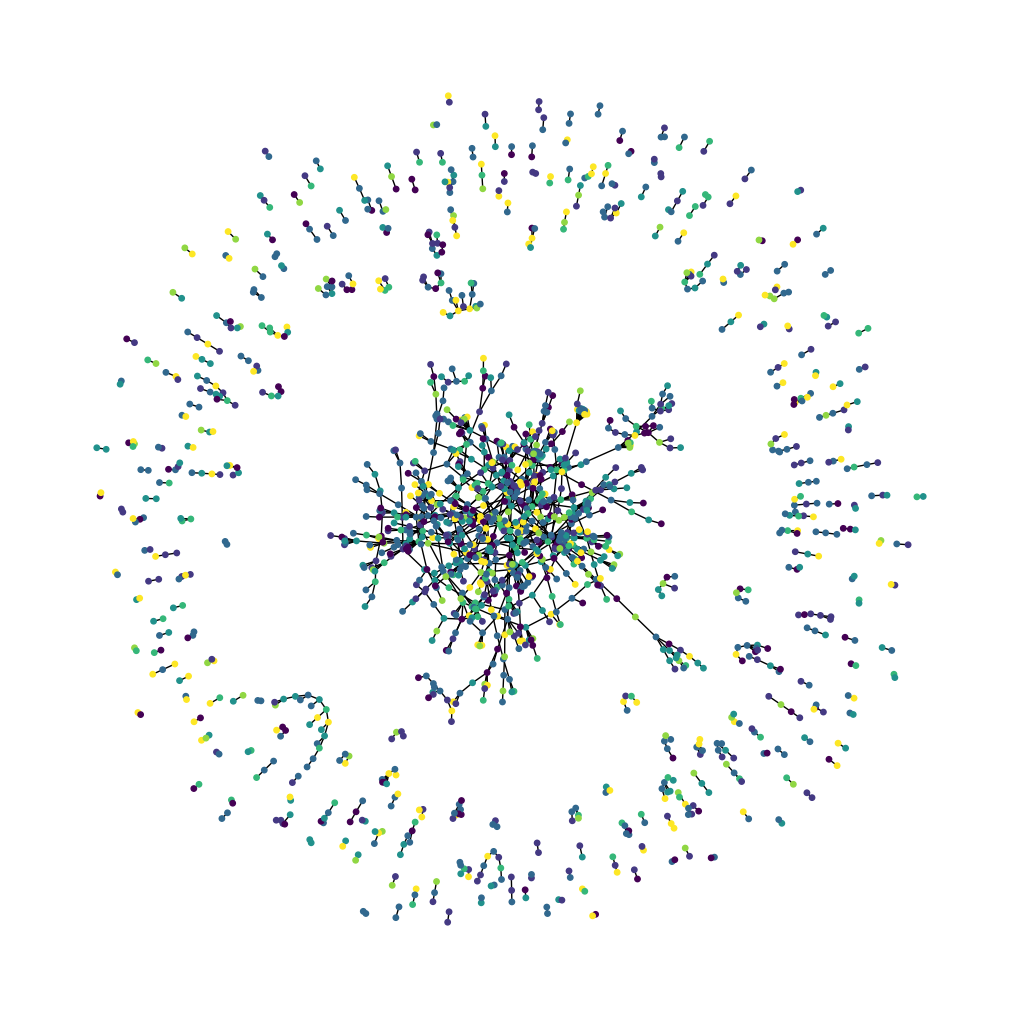

In [25]:
plt.figure(figsize=(10, 10))
colors = papers["subject"].tolist()
cora_graph = nx.from_pandas_edgelist(citations.sample(n=1500))
subjects = list(papers[papers["paper_id"].isin(list(cora_graph.nodes))]["subject"])
nx.draw_spring(cora_graph, node_size=15, node_color=subjects)
